<a href="https://colab.research.google.com/github/yomnabarakate21/Computer-vision-Course-assignments/blob/master/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random;
from pylab import *
from numpy import *;
import cv2 
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the image
test_downloaded=drive.CreateFile({'id':'1U2pWhLAlNe1hAcQutiBYLA2nqk3ePnN_'})
test_downloaded.GetContentFile('coin.PNG')

# **Convert RGB to grey scaled image**

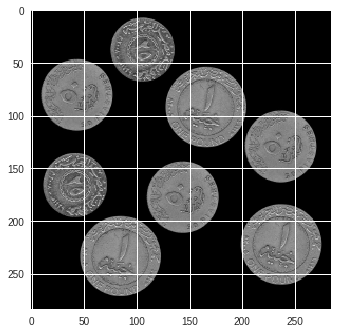

In [31]:
gray_img = array(Image.open('coin.PNG').convert('L'))   

plt.imshow(gray_img, cmap="gray")
plt.show()

# **Smoothing the image**
Smoothing the image is accomplished using a 2-dimensional median smoothing lter. 

A windowsize of seven will be suitable for the provided data set.

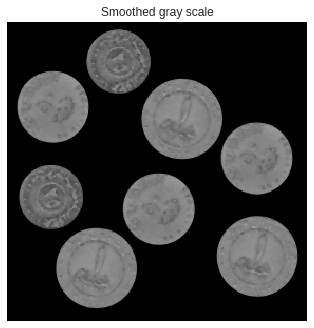

In [34]:
smoothed_img = cv2.medianBlur(gray_img,3)
plt.imshow(smoothed_img,cmap="gray"),plt.title('Smoothed gray scale'),plt.xticks([]), plt.yticks([])  
plt.show()